# DATA1050 Project

## Table of Contents

**1. [Introduction](#intro)**
    
**2. [Preprocessing](#prep)**
>**2.1 | [Data/Module Imports](#datastart)**  
>**2.2 | [Quick EDA of Entire Dataset](#quickeda)**  
>**2.3 | [Feature Engineering](#FE)**  
>**2.4 | [Data Splitting](#DS)**   
>**2.5 | [Data Encoding](#DE)**   

**3. [Feature Selection: Correlation/Correlation Matrix](#correlation)**
>**3.1 | [Linear Correlation: F Test](#ftest)**  
>**3.2 | [Non-Linear Correlation: Mutual Information](#mutual)**  
>**3.3 | [Selecting the 'Best' features for both City and Resort Hotels ](#hotel)**  


**4. [EDA: Individual Features (chosen based on Correlation)](#eda)**
>**4.1 | [adr (Target)](#adr)**  
>**4.2 | [market_segment](ms)**   
>**4.3 | [reserved_room_type](rrt)**  
>**4.4 | [assigned_room_type](ast)**   
>**4.5 | [children](children)**   
>**4.6 | [agent]()**     
>**4.7 | [lead_time]()**     
>**4.8 | [stays_in_week_nights]()**   
>**4.9 | [stays_in_weekend_nights]()**   
>**4.10 | [deposit_type]()**    
>**4.11 | [country]()**   
>**4.12 | [days_in_waiting_list]()**   
>**4.13 | [meal]()**   


**5. [EDA: Multivariate EDA](#multieda)**




---

<a id = 'intro'><a/>

## 1.  Introduction

**Mission Statement:** 

The hotel industry, approximately worth 822 Billion (MaximizeMarkeResearch), is a mercurial environment stimulated by our need to explore every corner of the globe. While the industry has generally been booming with the increase in the younger generations increased wealth and need to travel on top of technological advances to make check-ins and booking easier, recent events such as COVID, has shown the industry what the financial impact can be if travel were to stop all together. As a result, it becomes incredibely important for hotels/resorts to understand their financial health as well as understand what factors may contribute to their bottom line.


Source:https://www.maximizemarketresearch.com/market-report/hotels-market/47478/#:~:text=Hotels%20Market%20was%20valued%20at%20USD%20822.86%20Billion,return%20for%20money%20-%20on%20a%20short-term%20basis.

---

<a id = 'prep'><a/>

## 2. Preprocessing

###  *2.1  &ensp; Data/Module Imports*

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer
import calendar
from sklearn.feature_selection import SelectKBest
import plotly.express as px
import folium
import kaleido
import os


In [2]:
#read in dataset
df = pd.read_csv('data\hotel_bookings.csv')

### 2.2 &ensp; Quick EDA of Entire Dataset

In [3]:
#shape of dataframe
print('row:', df.shape[0], '|' , 'column:', df.shape[1])

row: 119390 | column: 32


In [4]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0                7/1/2015  
1                7/1/2015  
2                7/2/2015  
3                7/2/2015  
4                7/3/2015  

[5 rows x 32 columns]

In [5]:
#dtypes of columnms
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
nan = pd.DataFrame({'Missing Value' : df.isnull().sum(), '%Missing Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
nan

Missing Value  %Missing Values
hotel                                       0         0.000000
is_canceled                                 0         0.000000
lead_time                                   0         0.000000
arrival_date_year                           0         0.000000
arrival_date_month                          0         0.000000
arrival_date_week_number                    0         0.000000
arrival_date_day_of_month                   0         0.000000
stays_in_weekend_nights                     0         0.000000
stays_in_week_nights                        0         0.000000
adults                                      0         0.000000
children                                    4         0.003350
babies                                      0         0.000000
meal                                        0         0.000000
country                                   488         0.408744
market_segment                              0         0.000000
distribution_channel                        0         0.000000
is_repeated_guest                           0         0.000000
previous_cancellations                      0         0.000000
previous_bookings_not_canceled              0         0.000000
reserved_room_type                          0         0.000000
assigned_room_type                          0         0.000000
booking_changes                             0         0.000000
deposit_type                                0         0.000000
agent                                   16340        13.686238
company                                112593        94.306893
days_in_waiting_list                        0         0.000000
customer_type                               0         0.000000
adr                                         0         0.000000
required_car_parking_spaces                 0         0.000000
total_of_special_requests                   0         0.000000
reservation_status                          0         0.000000
reservation_status_date                     0         0.000000

### 2.3 &ensp; Feature Engineering

> #### 2.3.1  &ensp; Creating New Feature: Season

In [7]:
##creating a new feature: Season to take into account the month

#function
def monToSeason(Mon):
    return {
            'January': 'Winter',
            'February': 'Winter',
            'March': 'Spring',
            'April': 'Spring',
            'May': 'Spring',
            'June': 'Summer',
            'July': 'Summer',
            'August': 'Summer',
            'September': 'Fall', 
            'October': 'Fall',
            'November': 'Fall',
            'December': 'Winter'
    }[Mon]

#creating arrival month_num column
df['Season'] =  [monToSeason(date) for date in df['arrival_date_month']]

In [8]:
#check seasons
df.loc[:,['arrival_date_month','Season']]

arrival_date_month  Season
0                    July  Summer
1                    July  Summer
2                    July  Summer
3                    July  Summer
4                    July  Summer
...                   ...     ...
119385             August  Summer
119386             August  Summer
119387             August  Summer
119388             August  Summer
119389             August  Summer

[119390 rows x 2 columns]

> #### 2.3.2 &ensp; Adding new company ID to represent reservations that weren't booked by companies

**Reason** : Although over 94% of values are missing, it is better to categorize the 94% with the same ID without dropping the column

In [9]:
#filling in missing values with ID: 0 to represent bookings not made by companies
df['company'].fillna(0, inplace = True) #0 is equal to no agent

In [10]:
#checking
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Season'],
      dtype='object')

> #### 2.3.3 &ensp; Deleting rows with missing values for 'country'

**Reason** : 488 rows or 0.5% of the total number of rows have missing values. I deem it small enough that it won't have a significant impact on my analysis

In [11]:
#dropping rows with missing values for column, 'country'
df  = df.dropna( how='any',subset=['country'])

> #### 2.3.4 &ensp; Filling in missing values for columns, "Agent", with 'No Agent'

**Reason** : Rather than dropping the rows or column, I propose we fill in missing values with 'No Agent' to signify that the hotel reservation was made by the individual rather than by a booking. company. This may prove insightful as I would like to preserve as many features as possible

In [12]:
df['agent'].fillna(0, inplace = True) #0 is equal to no agent

> #### 2.3.5 &ensp; Extracting Month from Reservation Status Date


**Reason** : Similar to 'Arrival_Date_Month', I would like to track the monthly variation in reservation status change. Tracking by years seems inadequate as we only have 3 years of data

In [13]:
##checking to see if reservation date and arrival month are basically the same

#creating 'reservation_status_date' as a datetime object
df['reservation_status_date'] = df['reservation_status_date'].apply(pd.to_datetime)


#create new columns: reservation_status_month, reservation_status_year, reservation_status_day

df['res_status_month_num'] = df['reservation_status_date'].dt.month
df['res_status_month'] = df['res_status_month_num'].apply(lambda x: calendar.month_name[x])
df['res_status_year'] = str(df['reservation_status_date'].dt.year)

### 2.4 &ensp; Splitting Data

In [14]:
#splitting data into resort vs city

df_city = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']

#getting rid of hotel columns

df_city = df_city.drop('hotel', axis = 1)
df_resort = df_resort.drop('hotel', axis = 1)

In [15]:
len(df_resort)

39596

In [16]:
#function for splitting data into 3 sets (train,val,holdout)

def basic_split(X,y,train_size,val_size,test_size,random_state):
    
    # test the inputs
    if train_size+val_size+test_size != 1:
        raise ValueError('partitions must equal to 1!')
    if isinstance(random_state,int) == False:
        raise ValueError('random state must be an integer!')
    
    # perform basic split
    X_train, X_other, y_train, y_other = train_test_split(X,y,\
                                train_size = train_size, random_state = random_state)
    val = val_size/(val_size+test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                        train_size = val, random_state = random_state)
    
    # test the outputs
    if train_size != round(len(X_train)/(len(X_train)+len(X_val)+len(X_test)),1):
        raise ValueError("X_train and y_train are not the right size!")    
    if val_size != round(len(X_val)/(len(X_train)+len(X_val)+len(X_test)),1):
        raise ValueError("X_val and y_val are not the right size!")
    if test_size != round(len(X_test)/(len(X_train)+len(X_val)+len(X_test)),1):
        raise ValueError("X_test and x_test are not the right size!")

    return X_train, y_train, X_val, y_val, X_test, y_test


In [17]:
##City Hotel Split

#split features and target
city_y = df_city['adr']
city_X = df_city.loc[:,df_city.columns != 'adr']

#creating split
c_X_train, c_y_train, c_X_val, c_y_val, c_X_test, c_y_test = basic_split(city_X, city_y, .6,.2,.2,13)

In [18]:
#Resort Hotel Split

#split features and target
resort_y = df_resort['adr']
resort_X = df_resort.loc[:,df_resort.columns != 'adr']

#creating split
r_X_train, r_y_train, r_X_val, r_y_val, r_X_test, r_y_test = basic_split(resort_X, resort_y, .6,.2,.2,13)



In [19]:
#step 1
print('Step 1. Split into 2 datasets:')
print("df_city = df[df['hotel'] == 'City Hotel']")
print("df_resort = df[df['hotel'] == 'Resort Hotel']")
print('\n')
#step 2
print("# of Rows:")
print("len(City Hotel DF):",len(df_city))
print("len(resort Hotel DF):",len(df_resort))
print('\n')
#step 3
print('Step 2. Split 2 datasets so each has test, val, and test set:')
print('City Hotel: c_X_train:', len(c_X_train), '\t  c_X_val:', len(c_X_val),'\t  c_X_test:', len(c_X_test))
print('Resort Hotel: r_X_train:', len(r_X_train), '\t  r_X_val:', len(r_X_val),'\t  c_X_test:', len(r_X_test))

Step 1. Split into 2 datasets:
df_city = df[df['hotel'] == 'City Hotel']
df_resort = df[df['hotel'] == 'Resort Hotel']


# of Rows:
len(City Hotel DF): 79306
len(resort Hotel DF): 39596


Step 2. Split 2 datasets so each has test, val, and test set:
City Hotel: c_X_train: 47583 	  c_X_val: 15861 	  c_X_test: 15862
Resort Hotel: r_X_train: 23757 	  r_X_val: 7919 	  c_X_test: 7920


### 2.5 &ensp; Preprocessing

In [20]:
#collect different features

cat_ftrs = ['is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type', 'deposit_type', \
            'agent','customer_type','reservation_status','Season','company']



ordinal_ftrs = ['arrival_date_month','res_status_month']


ordinal_cats = [['January','February','March','April','May','June','July','August','September','October','November','December'],\
               ['January','February','March','April','May','June','July','August','September','October','November','December']]

            
num_ftrs = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies', 'previous_cancellations','previous_bookings_not_canceled', \
            'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
        

In [21]:
##create pipelines and transformers to encode the column data

#OneHotEncoder
cat_transformer = Pipeline(steps =[
    ('onehot',OneHotEncoder(sparse = False, handle_unknown='ignore'))])
                           
#StandardScaler
num_transformer = Pipeline(steps = [
     ('imputer', SimpleImputer(strategy='most_frequent')), #to address the 4 missing values in children
    ('stnd', StandardScaler())])


#OrdinalEncoder
ord_transformer = Pipeline(steps = [
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])
               

preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer,num_ftrs),
        ('onehot',cat_transformer, cat_ftrs)])



In [22]:
#fit_transform the training sets FOR CITY HOTEL
c_X_prep = preprocessor.fit_transform(c_X_train)

#getting feature names after the fit
c_feature_name = preprocessor.get_feature_names_out()

#converting numpy array in df with feature names FOR CITY HOTEL
c_df_train = pd.DataFrame(data = c_X_prep, columns = c_feature_name)
print("City Hotel Preprocessed Training Data Shape:" , c_df_train.shape)

#transform validation
c_X_val_prep = preprocessor.transform(c_X_val)
c_df_val = pd.DataFrame(data = c_X_val, columns = c_feature_name)


#transform testing set
c_X_test_prep = preprocessor.transform(c_X_test)
c_df_test = pd.DataFrame(data = c_X_test, columns = c_feature_name)


C:\Users\stuar\anaconda3\envs\data1030\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


City Hotel Preprocessed Training Data Shape: (47583, 590)


In [23]:
#fit_transform the training sets FOR CITY HOTEL
r_X_prep = preprocessor.fit_transform(r_X_train)

#getting feature names after the fit
r_feature_name = preprocessor.get_feature_names_out()


#converting numpy array in df with feature names FOR CITY HOTEL
r_df_train = pd.DataFrame(data = r_X_prep, columns = r_feature_name)
print("Resort Hotel Preprocessed Training Data Shape:" , r_df_train.shape)

#transform validation
r_X_val_prep = preprocessor.transform(c_X_val)
r_df_val = pd.DataFrame(data = r_X_val, columns = r_feature_name)


#transform testing set
r_X_test_prep = preprocessor.transform(c_X_test)
r_df_test = pd.DataFrame(data = c_X_test, columns = r_feature_name)

C:\Users\stuar\anaconda3\envs\data1030\lib\site-packages\sklearn\impute\_base.py:54: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


Resort Hotel Preprocessed Training Data Shape: (23757, 534)


In [24]:
print('Shapes of all sets post-preprocessing:')
print('City Hotel:   c_X_train:', c_df_train.shape, '\t  c_X_val:', c_df_val.shape, '\t c_X_test:', c_df_test.shape)
print('Resort Hotel: r_X_train:', r_df_train.shape, '\t  r_X_val:', r_df_val.shape, '\t \t r_X_test:', r_df_test.shape)

Shapes of all sets post-preprocessing:
City Hotel:   c_X_train: (47583, 590) 	  c_X_val: (15861, 590) 	 c_X_test: (15862, 590)
Resort Hotel: r_X_train: (23757, 534) 	  r_X_val: (7919, 534) 	 	 r_X_test: (15862, 534)


---

## 3. &ensp; Feature Selection

<a id = 'ftest'><a/>

> ### 3.1 &ensp; Linear Correlation: F-Test

**Standard**: 5% Significance Level

In [25]:
##CITY HOTEL

#finding f_stats for city hotel
c_f_stats = f_regression(c_df_train, c_y_train)

#top 20 correlated features
data = list(zip(c_df_train.columns,c_f_stats[1]))
lin_df =pd.DataFrame(data, columns = ['features','p-values'])
lin_df = lin_df.sort_values(by='p-values', ascending = True).reset_index(drop =True)
c_sig_features = lin_df[lin_df['p-values'] <= 0.05]



In [26]:
#TESTING SELECTKBEST

fs = SelectKBest(score_func=f_regression, k=5)
"""
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)
return X_train_fs, X_test_fs, fs
"""

#finding f_stats for city hotel and 5 best features
fs.fit(c_df_train, c_y_train)
x_train_test = fs.transform(c_df_train)
                            
x_train_names = fs.get_feature_names_out()

data = list(zip(x_train_names,x_train_test))
lin_df =pd.DataFrame(data, columns = ['features','p-values'])
lin_df


features  \
0                     num__children   
1  onehot__market_segment_Online TA   
2      onehot__reserved_room_type_A   
3      onehot__assigned_room_type_A   
4                 onehot__agent_9.0   

                                     p-values  
0  [-0.24449878711302242, 0.0, 1.0, 1.0, 0.0]  
1  [-0.24449878711302242, 0.0, 1.0, 1.0, 0.0]  
2  [-0.24449878711302242, 1.0, 1.0, 0.0, 1.0]  
3  [-0.24449878711302242, 1.0, 0.0, 0.0, 1.0]  
4  [-0.24449878711302242, 0.0, 1.0, 1.0, 0.0]

In [27]:
##RESORT HOTEL

#finding f_stats for resort hotel
r_f_stats = f_regression(r_df_train, r_y_train)

#top 20 correlated features
data = list(zip(r_df_train.columns,r_f_stats[1]))
lin_df =pd.DataFrame(data, columns = ['features','p-values'])
lin_df = lin_df.sort_values(by='p-values', ascending = True).reset_index(drop =True)
lin_df.head(20)

r_sig_features = lin_df[lin_df['p-values'] <= 0.05]
r_sig_features

features  p-values
0    onehot__market_segment_Online TA  0.000000
1               onehot__Season_Summer  0.000000
2        onehot__reserved_room_type_A  0.000000
3                       num__children  0.000000
4               onehot__Season_Winter  0.000000
..                                ...       ...
223             onehot__company_204.0  0.043964
224               onehot__agent_143.0  0.045141
225               onehot__agent_270.0  0.045880
226               onehot__agent_154.0  0.046884
227               onehot__country_FIN  0.047157

[228 rows x 2 columns]

<a id = 'mutual'><a/>

> ### 3.2 &ensp; Non-Linear Correlation: Mutual Information

In [28]:
##CITY HOTEL

#finding mutual information for city hotel
c_m_i = mutual_info_regression(c_df_train, c_y_train)

#top 20 correlated features
data = list(zip(c_df_train.columns,c_m_i))
nonlin_df =pd.DataFrame(data, columns = ['features','Mutual Dependence Measure'])
c_nonlin_df = nonlin_df.sort_values(by='Mutual Dependence Measure', \
                                  ascending = False).reset_index(drop =True)

c_nonlin_df

features  Mutual Dependence Measure
0                      num__lead_time                   0.943262
1    onehot__market_segment_Online TA                   0.321077
2                   onehot__agent_9.0                   0.287206
3       onehot__market_segment_Groups                   0.228520
4                   onehot__agent_1.0                   0.222901
..                                ...                        ...
585               onehot__country_UKR                   0.000000
586               onehot__agent_371.0                   0.000000
587               onehot__country_UGA                   0.000000
588               onehot__agent_391.0                   0.000000
589               onehot__agent_476.0                   0.000000

[590 rows x 2 columns]

In [29]:
##RESORT HOTEL

#finding mutual information for city hotel
r_m_i = mutual_info_regression(r_df_train, r_y_train)

#top 20 correlated features
data = list(zip(r_df_train.columns,r_m_i))
nonlin_df =pd.DataFrame(data, columns = ['features','Mutual Dependence Measure'])
r_nonlin_df = nonlin_df.sort_values(by='Mutual Dependence Measure', \
                                  ascending = False).reset_index(drop =True)

r_nonlin_df

features  Mutual Dependence Measure
0                  num__lead_time                   0.607698
1           onehot__Season_Summer                   0.352842
2       num__stays_in_week_nights                   0.234628
3    onehot__reserved_room_type_A                   0.190219
4                     num__adults                   0.165866
..                            ...                        ...
529           onehot__agent_508.0                   0.000000
530           onehot__agent_510.0                   0.000000
531           onehot__country_ISR                   0.000000
532           onehot__country_IND                   0.000000
533         onehot__company_543.0                   0.000000

[534 rows x 2 columns]

>### 3.3 &ensp; Selecting the 'Best' features for both City and Resort Hotels 

**Number of Features chosen for EDA:** 15

#### CITY HOTEL

In [30]:
#Correlated Features: Nonlinear + Linear
c_top_15_lin = c_sig_features.iloc[:15,0]
#Non-Linear Correlation
c_top_15_nonlin = c_nonlin_df.iloc[:15,0]

#combining them into one df
c_corr_features = pd.DataFrame(data = zip(c_top_15_lin,c_top_15_nonlin), columns = ['Linearly Correlated','Non-Linearly Correlated'])
c_corr_features

Linearly Correlated  \
0           onehot__market_segment_Groups   
1            onehot__reserved_room_type_E   
2            onehot__reserved_room_type_F   
3            onehot__reserved_room_type_G   
4            onehot__assigned_room_type_A   
5            onehot__assigned_room_type_D   
6            onehot__assigned_room_type_F   
7            onehot__assigned_room_type_G   
8                       onehot__agent_1.0   
9                       onehot__agent_9.0   
10       onehot__market_segment_Online TA   
11           onehot__reserved_room_type_D   
12        onehot__customer_type_Transient   
13  onehot__customer_type_Transient-Party   
14   onehot__market_segment_Complementary   

                 Non-Linearly Correlated  
0                         num__lead_time  
1       onehot__market_segment_Online TA  
2                      onehot__agent_9.0  
3          onehot__market_segment_Groups  
4                      onehot__agent_1.0  
5           onehot__reserved_room_type_A  
6                            num__adults  
7        onehot__deposit_type_No Deposit  
8        onehot__deposit_type_Non Refund  
9                    onehot__country_PRT  
10             num__stays_in_week_nights  
11          onehot__assigned_room_type_A  
12  onehot__market_segment_Offline TA/TO  
13             num__days_in_waiting_list  
14                       onehot__meal_BB

All Correlated Features:
Seasons, market_segment, reserved_room_type, lead_time,agent,adults, deposit_type, country, customer_type, meal, stay_in_week_nights, days_in_waiting_list


#### RESORT HOTEL

In [31]:
#Correlated Features: Nonlinear + Linear
r_top_15_lin = r_sig_features.iloc[:15,0]
#Non-Linear Correlation
r_top_15_nonlin = r_nonlin_df.iloc[:15,0]

#combining them into one df
r_corr_features = pd.DataFrame(data = zip(r_top_15_lin,r_top_15_nonlin), columns = ['Linearly Correlated','Non-Linearly Correlated'])
r_corr_features

Linearly Correlated  \
0         onehot__market_segment_Online TA   
1                    onehot__Season_Summer   
2             onehot__reserved_room_type_A   
3                            num__children   
4                    onehot__Season_Winter   
5             onehot__reserved_room_type_G   
6                      onehot__agent_240.0   
7             onehot__assigned_room_type_G   
8                      onehot__Season_Fall   
9                    onehot__Season_Spring   
10                         onehot__meal_HB   
11  onehot__distribution_channel_Corporate   
12            onehot__reserved_room_type_H   
13                         onehot__meal_BB   
14           onehot__market_segment_Groups   

                 Non-Linearly Correlated  
0                         num__lead_time  
1                  onehot__Season_Summer  
2              num__stays_in_week_nights  
3           onehot__reserved_room_type_A  
4                            num__adults  
5           num__stays_in_weekend_nights  
6          onehot__market_segment_Groups  
7       onehot__market_segment_Online TA  
8   onehot__market_segment_Offline TA/TO  
9                    onehot__agent_240.0  
10                       onehot__meal_BB  
11                 onehot__Season_Winter  
12                 onehot__Season_Spring  
13                       onehot__meal_HB  
14          onehot__assigned_room_type_A

Features:

Season, market_segment, reserved_room_type, children, agent,assigned_room_type, lead_time,stays_in_week_nights, stays_in_weekend_nights, adults, meal

---

<a id = 'eda'></a>

## 4. EDA

<a id = 'adr'></a>

> ### *4.1  &ensp; EDA on Target Variable: adr*

In [32]:
#descriptive statistics: target
df['adr'].describe()

count    118902.000000
mean        102.000808
std          50.487004
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [33]:
# Getting rid of the 2 outliers impacting our data
df.drop(df[df['adr'] == -6.38].index, inplace = True)
df.drop(df[df['adr'] == 5400].index, inplace = True)

#confirming that we got rid of the outliers
df['adr'].describe()

count    118900.000000
mean        101.957161
std          48.091654
min           0.000000
25%          70.000000
50%          95.000000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

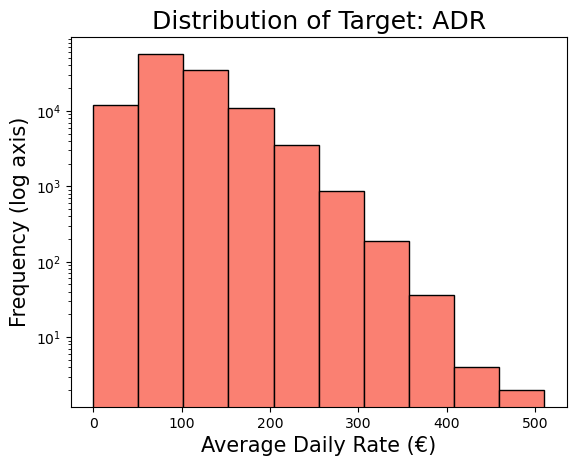

In [34]:
#plotting distribution of target: HISTOGRAM
plt.title("Distribution of Target: ADR", fontsize= 18)
plt.xlabel('Average Daily Rate (€)',fontsize= 15)
plt.ylabel('Frequency (log axis)',fontsize= 15)
plt.hist(df['adr'], color = 'salmon', edgecolor = 'black' )
plt.semilogy()
plt.savefig('figures/adr_Histogram_Distriubtion.png', dpi = 300)
plt.show()

C:\Users\stuar\anaconda3\envs\data1030\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


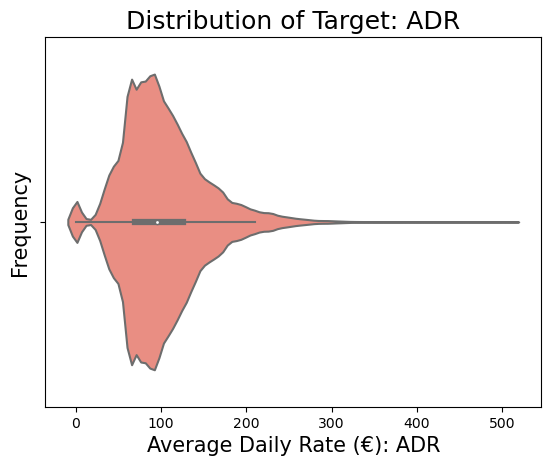

In [35]:
#plotting distribution of target: VIOLINPLOT
sns.violinplot(df['adr'], orient='h' , color = 'salmon')

plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Average Daily Rate (€): ADR', fontsize = 15)
plt.title('Distribution of Target: ADR', fontsize = 18)
plt.savefig('figures/adr - Violin Distriubtion.png', dpi = 300)
plt.show()

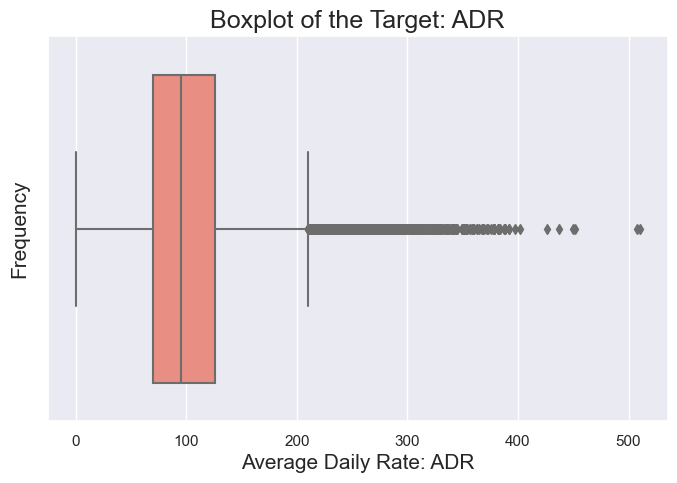

In [85]:
#plotting distribution of target:BOXPLOT
sns.boxplot(x= df['adr'], color = 'salmon')
plt.title('Boxplot of the Target: ADR', fontsize = 18)

plt.ylabel('Frequency', fontsize = 15)
plt.xlabel('Average Daily Rate: ADR', fontsize = 15)
plt.savefig('figures/adr - Boxplot Distribution.png', dpi = 300)
plt.show()

> ### 4.2 &ensp; market_segment

In [37]:
#seeing general sense of values
df['market_segment'].describe()

count        118900
unique            8
top       Online TA
freq          56403
Name: market_segment, dtype: object

In [38]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['market_segment'].value_counts(), '%Count' : round(df['market_segment'].value_counts(normalize = True),5)*100})
count_num.rename_axis('Market Segments')

Counts  %Count
Market Segments                
Online TA         56403  47.437
Offline TA/TO     24159  20.319
Groups            19805  16.657
Direct            12449  10.470
Corporate          5111   4.299
Complementary       734   0.617
Aviation            237   0.199
Undefined             2   0.002

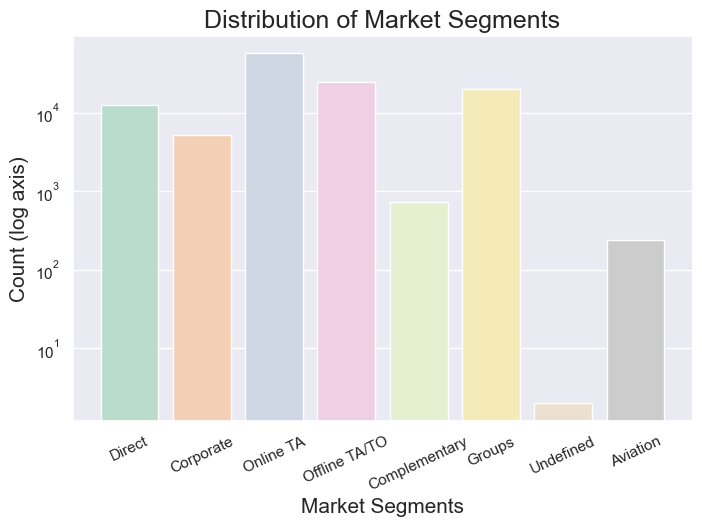

In [39]:
#distribution of market_segment
sns.set(rc={"figure.figsize":(8, 5)})
cplot = sns.countplot(x= df['market_segment'],palette = 'Pastel2')
plt.title( 'Distribution of Market Segments', fontsize = 18)
plt.semilogy()
plt.xlabel("Market Segments",fontsize = 15)
plt.xticks(rotation = 25)
plt.ylabel('Count (log axis)',fontsize = 15)
plt.savefig('figures/market_segment Countplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.3 &ensp; reserved_room_type

In [40]:
#seeing general sense of values
df['reserved_room_type'].describe()

count     118900
unique        10
top            A
freq       85599
Name: reserved_room_type, dtype: object

In [41]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['reserved_room_type'].value_counts(), '%Count' : round(df['reserved_room_type'].value_counts(normalize = True),5)*100})
count_num.rename_axis('reserved_room_type')

Counts  %Count
reserved_room_type                
A                    85599  71.992
D                    19173  16.125
E                     6497   5.464
F                     2890   2.431
G                     2083   1.752
B                     1118   0.940
C                      931   0.783
H                      601   0.505
L                        6   0.005
P                        2   0.002

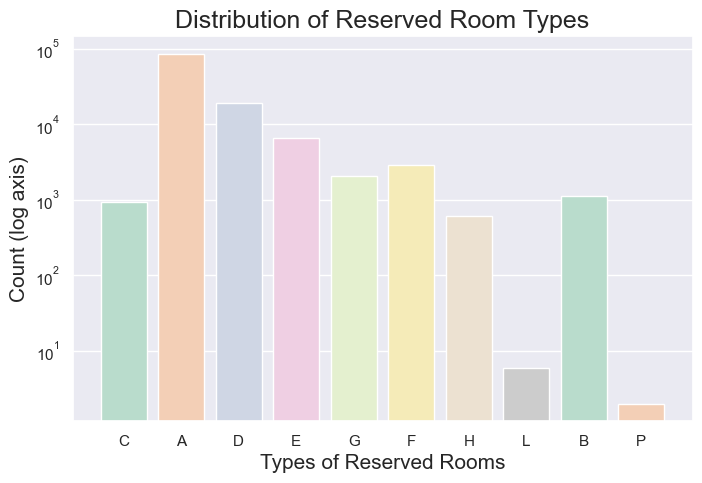

In [42]:
#distribution of reserved_room_type
cplot = sns.countplot(x= df['reserved_room_type'],palette = 'Pastel2')
plt.title('Distribution of Reserved Room Types', fontsize = 18)
plt.semilogy()
plt.xlabel("Types of Reserved Rooms",fontsize = 15)
plt.ylabel('Count (log axis)',fontsize = 15)
plt.savefig('figures/reserved_room_type Countplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.4 &ensp; assigned_room_type

In [43]:
#seeing general sense of values
df['assigned_room_type'].describe()

count     118900
unique        12
top            A
freq       73862
Name: assigned_room_type, dtype: object

In [44]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['assigned_room_type'].value_counts(), '%Count' : round(df['assigned_room_type'].value_counts(normalize = True),5)*100})
count_num.rename_axis('assigned_room_type')

Counts  %Count
assigned_room_type                
A                    73862  62.121
D                    25166  21.166
E                     7738   6.508
F                     3732   3.139
G                     2539   2.135
C                     2354   1.980
B                     2163   1.819
H                      707   0.595
I                      357   0.300
K                      279   0.235
P                        2   0.002
L                        1   0.001

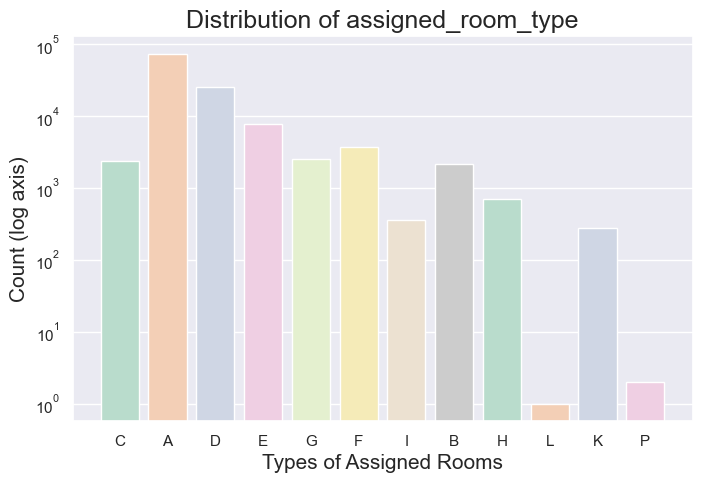

In [45]:
#distribution of assigned_room_type
cplot = sns.countplot(x= df['assigned_room_type'],palette = 'Pastel2')
plt.title ('Distribution of assigned_room_type',fontsize = 18)
plt.semilogy()
plt.xlabel("Types of Assigned Rooms",fontsize = 15)
plt.ylabel('Count (log axis)',fontsize = 15)
plt.savefig('figures/assigned_room_type Countplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.5 &ensp; children

In [46]:
#seeing general sense of values
df['children'].describe()

count    118896.000000
mean          0.104209
std           0.399175
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [47]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['children'].value_counts(), '%Count' : round(df['children'].value_counts(normalize = True),5)*100})
count_num.rename_axis('children')

Counts  %Count
children                
0.0       110317  92.784
1.0         4852   4.081
2.0         3650   3.070
3.0           76   0.064
10.0           1   0.001

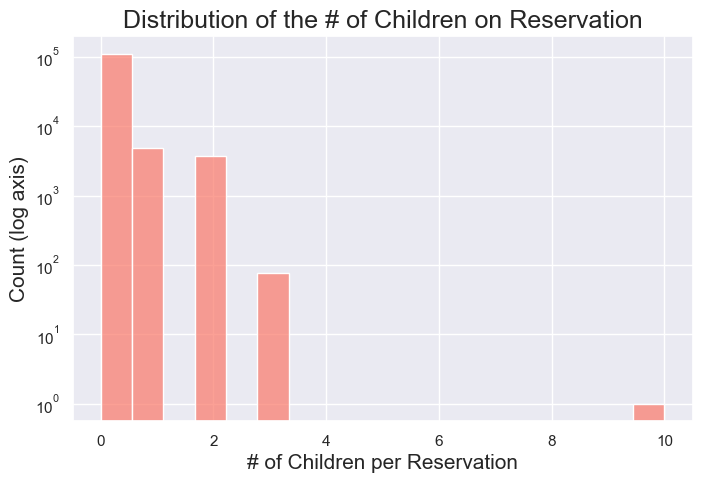

In [48]:
#distribution of assigned_room_type
cplot = sns.histplot(x= df['children'],color = 'salmon')
plt.title('Distribution of the # of Children on Reservation', fontsize = 18)
plt.semilogy()
plt.xlabel("# of Children per Reservation",fontsize = 15)
plt.ylabel('Count (log axis)', fontsize = 15)
plt.savefig('figures/children Countplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.6 &ensp; agent

In [49]:
#seeing general sense of values
df['agent'].describe()

count    118900.000000
mean         74.892801
std         107.143920
min           0.000000
25%           7.000000
50%           9.000000
75%         152.000000
max         535.000000
Name: agent, dtype: float64

In [50]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['agent'].value_counts(), '%Count' : round(df['agent'].value_counts(normalize = True),5)*100})
count_num.rename_axis('agent')

Counts  %Count
agent                
9.0     31960  26.880
0.0     16006  13.462
240.0   13871  11.666
1.0      7191   6.048
14.0     3639   3.061
...       ...     ...
285.0       1   0.001
289.0       1   0.001
265.0       1   0.001
333.0       1   0.001
497.0       1   0.001

[333 rows x 2 columns]

C:\Users\stuar\AppData\Local\Temp\ipykernel_16984\2349794276.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  agent_df.append(agent_df1)


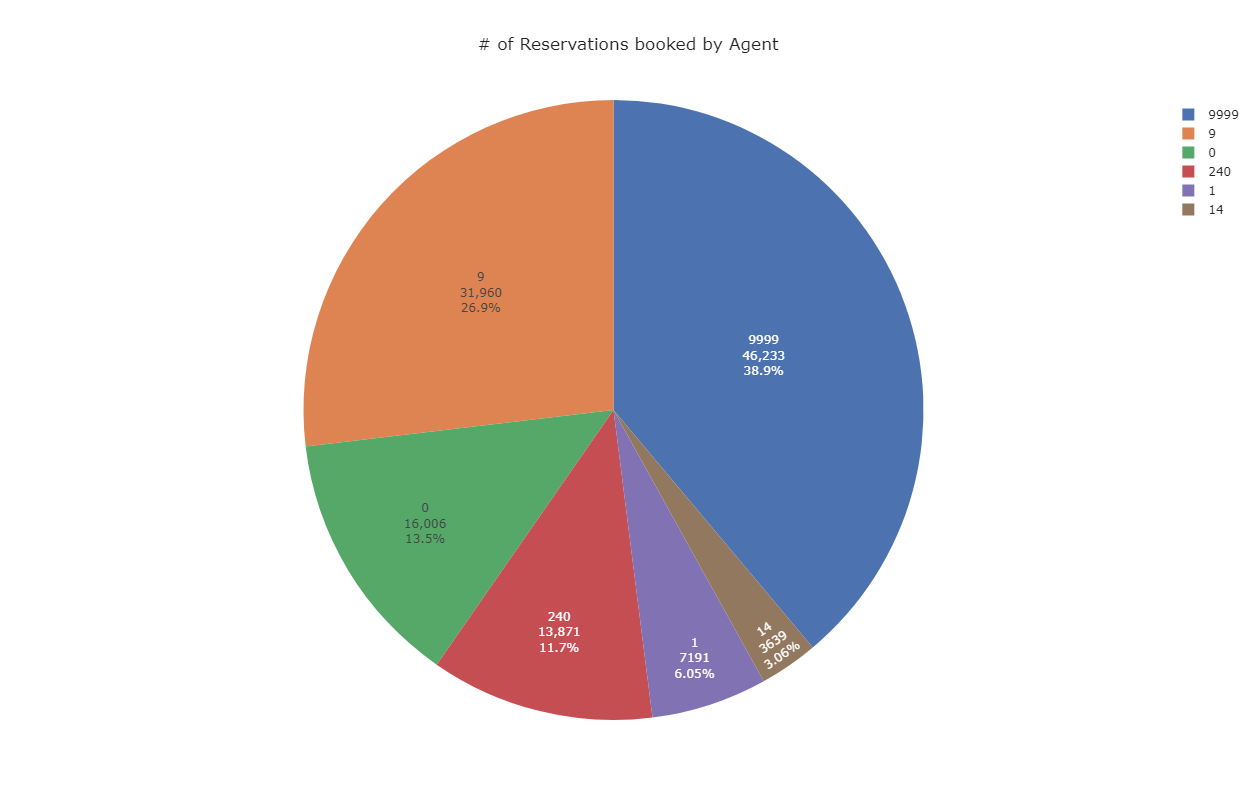

Note: ID: 9999, is a dummy ID that is an aggregate of all agents who are not in the top 5


In [51]:
## distriubtion of agent: pie plot

#



#top 5 highest res by agent

agent_data = zip(count_num.index.values[0:5],count_num.iloc[:5,0],count_num.iloc[:5,1])
agent_df = pd.DataFrame(agent_data, columns = ('Agent ID','Counts','%Counts'))
sum_of_rest = sum(count_num.iloc[5:,0])
percent_of_rest =sum(count_num.iloc[5:,1])
agent_df1 = agent_df.loc[len(agent_df.index)] = [9999, sum_of_rest, percent_of_rest]
agent_df.append(agent_df1)

fig = px.pie(agent_df,
             values="Counts",
             names="Agent ID",
             title="# of Reservations booked by Agent",
             template="seaborn",width=1000, height=800)
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

fig.write_image("figures/reservations_by_agent.png")

print('Note: ID: 9999, is a dummy ID that is an aggregate of all agents who are not in the top 5')

> ### 4.7 &ensp; lead_time

In [52]:
#seeing general sense of values
df['lead_time'].describe()

count    118900.000000
mean        104.307847
std         106.903514
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [53]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['lead_time'].value_counts(), '%Count' : round(df['lead_time'].value_counts(normalize = True),5)*100})
count_num.rename_axis('lead_time')

Counts  %Count
lead_time                
0            6223   5.234
1            3395   2.855
2            2034   1.711
3            1802   1.516
4            1696   1.426
...           ...     ...
400             1   0.001
370             1   0.001
532             1   0.001
371             1   0.001
463             1   0.001

[479 rows x 2 columns]

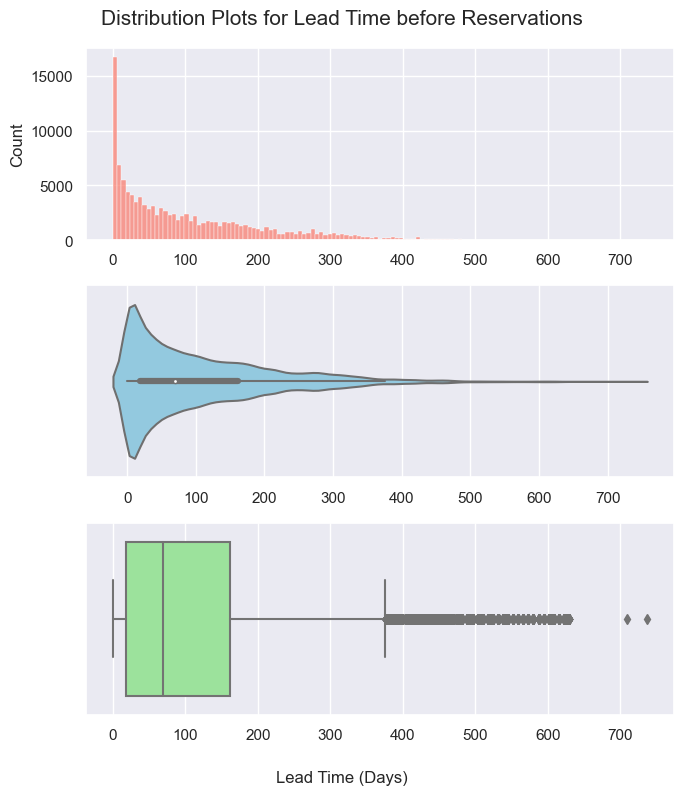

In [54]:
#violin plot/box plot/barplot
fig, ax = plt.subplots(3,1, figsize=(7, 8))

h = sns.histplot(x = df['lead_time'],ax=ax[0], color = 'salmon')
v = sns.violinplot(x=df['lead_time'],ax=ax[1], color='skyblue')
b = sns.boxplot(x = df['lead_time'],ax=ax[2], color = 'lightgreen')

#creating log axis



#setting equal axis
ax[2]=ax[0].twinx
ax[1]=ax[0].twinx

#getting rid of labels
h.set(xlabel=None)
v.set(xlabel = None)
b.set(xlabel = None)

#creating super labels
fig.supxlabel('Lead Time (Days)',fontsize=12)
fig.suptitle('Distribution Plots for Lead Time before Reservations',fontsize=15)
#fig.supylabel('Count')
fig.tight_layout()

plt.savefig('figures/lead_time subplots Distriubtion.png', dpi = 300)
plt.show()

> ### 4.8 &ensp; stay_in_weekend_nights

In [55]:
#seeing general sense of values
df['stays_in_weekend_nights'].describe()

count    118900.000000
mean          0.928873
std           0.996176
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          16.000000
Name: stays_in_weekend_nights, dtype: float64

In [56]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['stays_in_weekend_nights'].value_counts(), '%Count' : round(df['stays_in_weekend_nights'].value_counts(normalize = True),5)*100})
count_num.rename_axis('# of Weekend Nights')


Counts  %Count
# of Weekend Nights                
0                     51681  43.466
2                     33250  27.965
1                     30527  25.675
4                      1848   1.554
3                      1253   1.054
6                       153   0.129
5                        78   0.066
8                        60   0.050
7                        19   0.016
9                        11   0.009
10                        7   0.006
12                        5   0.004
13                        3   0.003
16                        3   0.003
14                        2   0.002

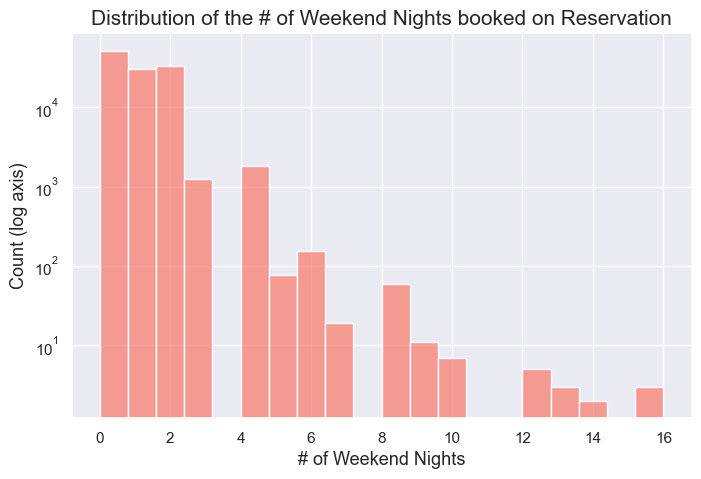

In [57]:
#distribution of assigned_room_type
cplot = sns.histplot(x= df['stays_in_weekend_nights'],color = 'salmon', binwidth  = 0.8)
plt.title('Distribution of the # of Weekend Nights booked on Reservation', fontsize = 15)
plt.semilogy()
plt.xlabel("# of Weekend Nights",fontsize = 13)
plt.ylabel('Count (log axis)', fontsize = 13)
plt.savefig('figures/Weekend_Nights_on_Reservation histplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.9 &ensp; stay_in_weekend_nights

In [58]:
#seeing general sense of values
df['stays_in_week_nights'].describe()

count    118900.000000
mean          2.502119
std           1.900148
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          41.000000
Name: stays_in_week_nights, dtype: float64

In [59]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['stays_in_week_nights'].value_counts(), '%Count' : round(df['stays_in_week_nights'].value_counts(normalize = True),5)*100})
count_num.rename_axis('# of Week Nights')

Counts  %Count
# of Week Nights                
2                  33576  28.239
1                  30090  25.307
3                  22203  18.674
5                  11052   9.295
4                   9554   8.035
0                   7594   6.387
6                   1490   1.253
10                  1030   0.866
7                   1027   0.864
8                    654   0.550
9                    231   0.194
15                    85   0.071
11                    55   0.046
19                    44   0.037
12                    42   0.035
20                    41   0.034
14                    35   0.029
13                    27   0.023
16                    16   0.013
21                    15   0.013
22                     7   0.006
25                     6   0.005
18                     6   0.005
30                     5   0.004
17                     4   0.003
24                     3   0.003
40                     2   0.002
33                     1   0.001
32                     1   0.001
26                     1   0.001
34                     1   0.001
35                     1   0.001
41                     1   0.001

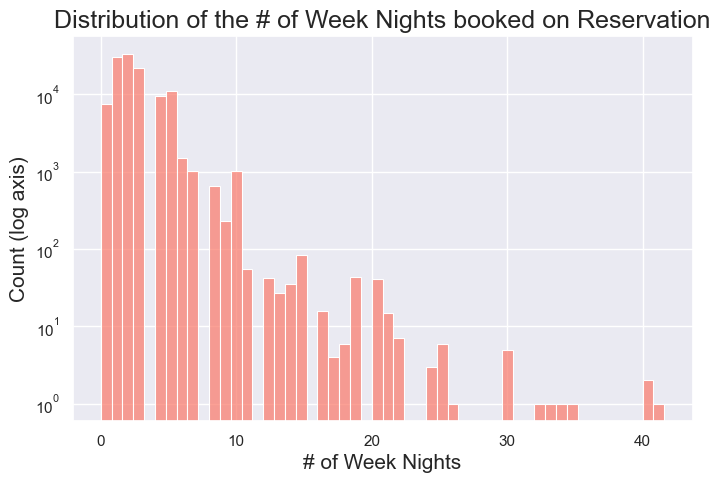

In [60]:
#distribution of assigned_room_type
cplot = sns.histplot(x= df['stays_in_week_nights'],color = 'salmon', binwidth  = 0.8)
plt.title('Distribution of the # of Week Nights booked on Reservation', fontsize = 18)
plt.semilogy()
plt.xlabel("# of Week Nights",fontsize = 15)
plt.ylabel('Count (log axis)', fontsize = 15)
plt.savefig('figures/Week_Nights_on_Reservation histplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.10 &ensp; deposit_type

In [61]:
#seeing general sense of values
df['deposit_type'].describe()

count         118900
unique             3
top       No Deposit
freq          104166
Name: deposit_type, dtype: object

In [62]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['deposit_type'].value_counts(), '%Count' : round(df['deposit_type'].value_counts(normalize = True),5)*100})
count_num.rename_axis('deposit_type')

Counts  %Count
deposit_type                
No Deposit    104166  87.608
Non Refund     14572  12.256
Refundable       162   0.136

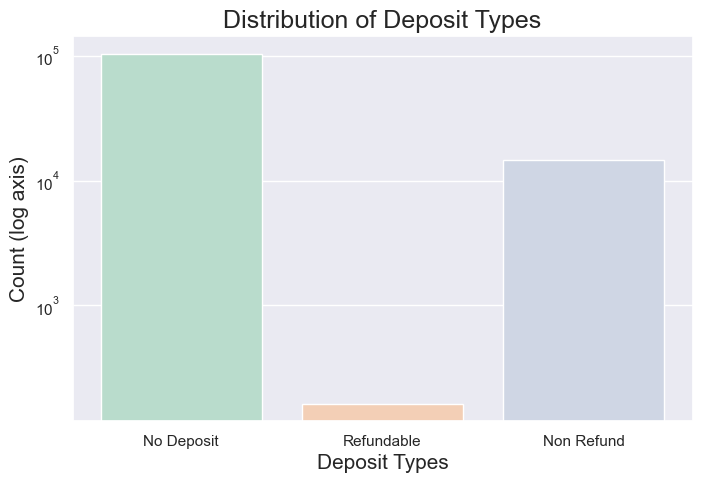

In [63]:
#distribution of assigned_room_type
cplot = sns.countplot(x= df['deposit_type'],palette = 'Pastel2')
plt.title ('Distribution of Deposit Types',fontsize = 18)
plt.semilogy()
plt.xlabel("Deposit Types",fontsize = 15)
plt.ylabel('Count (log axis)',fontsize = 15)
plt.savefig('figures/Deposit Countplot Distriubtion.png', dpi = 300)
plt.show()

> ### 4.11 &ensp; country

In [64]:
#seeing general sense of values
df['country'].describe()

count     118900
unique       177
top          PRT
freq       48589
Name: country, dtype: object

In [65]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['country'].value_counts(), 'Distribution %' : round(df['country'].value_counts(normalize = True),5)*100})
count_num.rename_axis('country')

Counts  Distribution %
country                        
PRT       48589          40.865
GBR       12128          10.200
FRA       10415           8.759
ESP        8568           7.206
DEU        7287           6.129
...         ...             ...
DJI           1           0.001
BWA           1           0.001
HND           1           0.001
VGB           1           0.001
NAM           1           0.001

[177 rows x 2 columns]

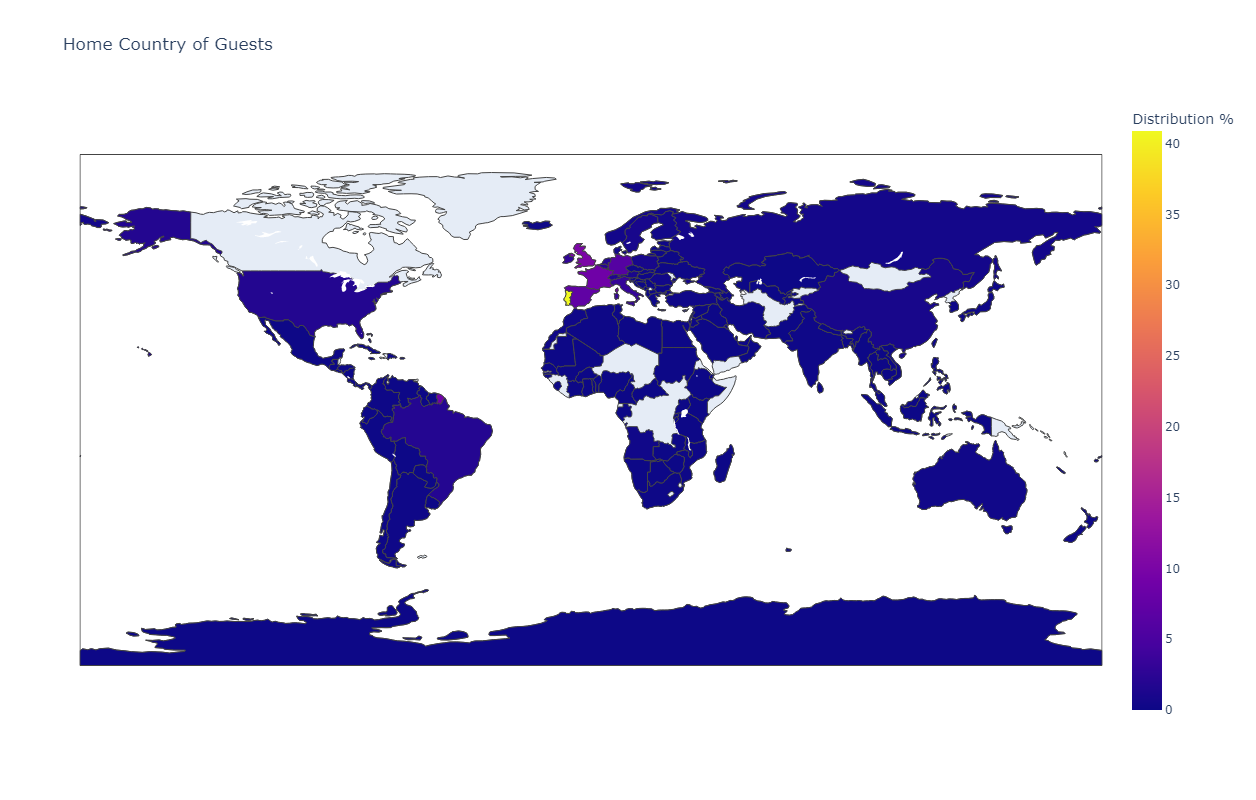

In [66]:
#Distribution of guests by country
guest_map = px.choropleth(count_num,
                    locations=count_num.index,
                    color=count_num["Distribution %"],  
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home Country of Guests",width=1000, height=800)
guest_map.show()
guest_map.write_image('figures/Guest Home Country Distriubtion.png')

<a id = 'waitlist'><a/>

> ### 4.11 &ensp; days_in_waiting_list

In [67]:
#seeing general sense of values
df['days_in_waiting_list'].describe()

count    118900.000000
mean          2.330715
std          17.630307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [68]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['days_in_waiting_list'].value_counts(), '%Count' : round(df['days_in_waiting_list'].value_counts(normalize = True),5)*100})
count_num.rename_axis('Days in WaitList')

Counts  %Count
Days in WaitList                
0                 115202  96.890
39                   227   0.191
58                   164   0.138
44                   141   0.119
31                   127   0.107
...                  ...     ...
116                    1   0.001
109                    1   0.001
37                     1   0.001
89                     1   0.001
36                     1   0.001

[128 rows x 2 columns]

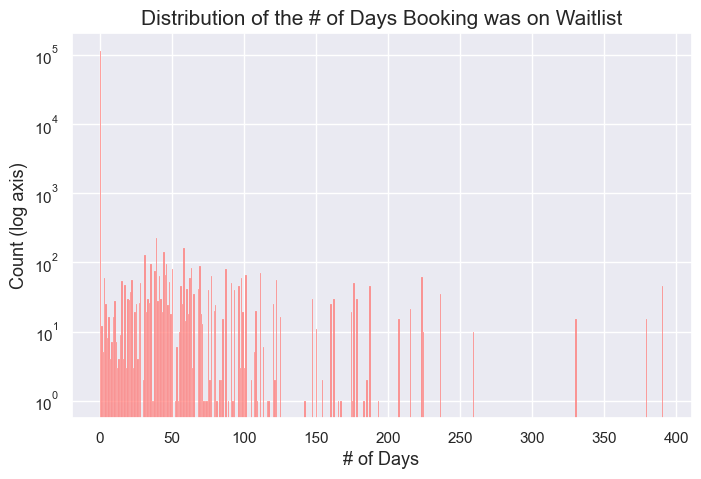

In [69]:
#distribution of number of days on wait list
cplot = sns.histplot(x= df['days_in_waiting_list'],color = '#FF6D6A', binwidth  = 1.0)
plt.title('Distribution of the # of Days Booking was on Waitlist', fontsize = 15)
plt.semilogy()
plt.xlabel("# of Days",fontsize = 13)
plt.ylabel('Count (log axis)', fontsize = 13)
plt.savefig('figures/DaysOnWaitlist histplot Distriubtion.png', dpi = 300)
plt.show()

<a id = 'meals'><a/>

> ### 4.12 &ensp; meal

In [70]:
#seeing general sense of values
df['meal'].describe()

count     118900
unique         5
top           BB
freq       91865
Name: meal, dtype: object

In [71]:
#identifying counts for each value
count_num = pd.DataFrame({ 'Counts' : df['meal'].value_counts(), '%Count' : round(df['meal'].value_counts(normalize = True),5)*100})
count_num.rename_axis('Meal Type')

Counts  %Count
Meal Type                
BB          91865  77.262
HB          14434  12.140
SC          10638   8.947
Undefined    1165   0.980
FB            798   0.671

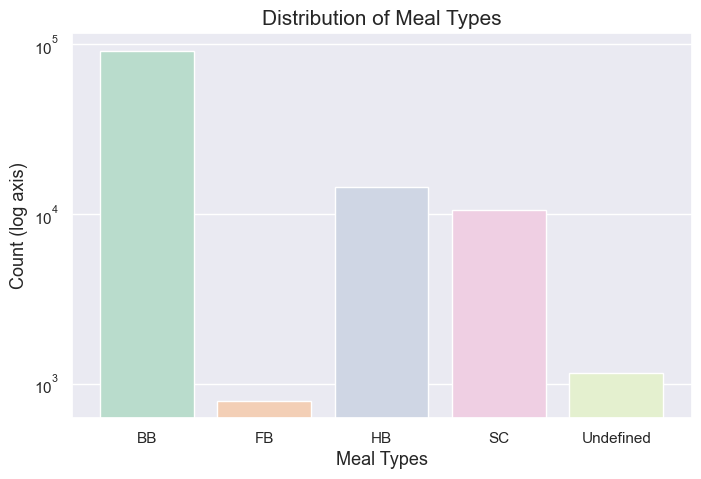

In [72]:
#distribution of assigned_room_type
cplot = sns.countplot(x= df['meal'],palette = 'Pastel2')
plt.title ('Distribution of Meal Types',fontsize = 15)
plt.semilogy()
plt.xlabel("Meal Types",fontsize = 13)
plt.ylabel('Count (log axis)',fontsize = 13)
plt.savefig('figures/meal type Countplot Distriubtion.png', dpi = 300)
plt.show()

## 5.  Multivariate EDA

C:\Users\stuar\AppData\Local\Temp\ipykernel_16984\3216997217.py:38: UserWarning:

FixedFormatter should only be used together with FixedLocator



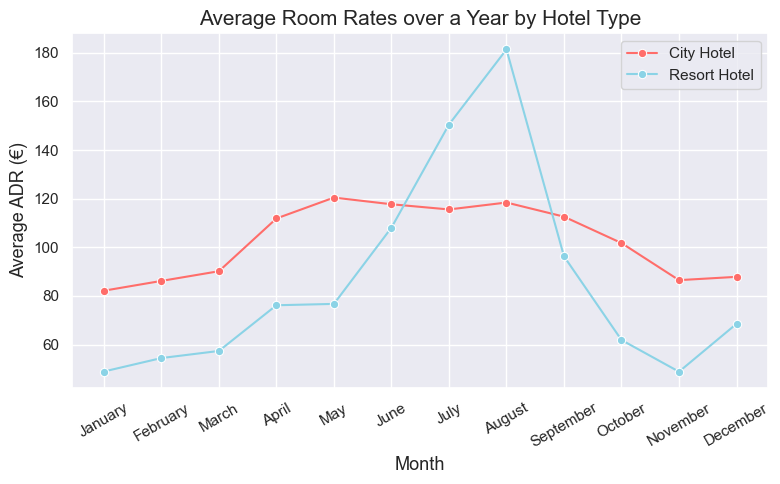

In [82]:
##(avg.) ADR vs Arrival Month by Hotel type

#getting only average adr of reservations that did not cancel
no_cancel = df[df['is_canceled'] == 0]

#setting order for x ticks
ordered_month = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']

#create a new dataframe: adr_month
adr_orderedMonth = pd.DataFrame(ordered_month, columns=['Month'])

#populating resort adr
resort_adr = []
for x in range(len(adr_orderedMonth)):
    no_cancel_r = no_cancel[no_cancel['hotel'] == 'Resort Hotel']
    avg = np.mean(no_cancel_r[no_cancel_r['arrival_date_month'] == adr_orderedMonth.iloc[x,0]]['adr']) 
    resort_adr.append(avg)
adr_orderedMonth['Resort_adr'] = resort_adr
                            
#populating city adr
city_adr = []
for x in range(len(adr_orderedMonth)):
    no_cancel_r = no_cancel[no_cancel['hotel'] == 'City Hotel']
    avg = np.mean(no_cancel_r[no_cancel_r['arrival_date_month'] == adr_orderedMonth.iloc[x,0]]['adr']) 
    city_adr.append(avg)
adr_orderedMonth['City_adr'] = city_adr
    
#define figure size
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(8, 5)})

#creating lineplot
sns.lineplot(data =adr_orderedMonth, x = 'Month', y = 'City_adr', color = '#FF6D6A', marker='o',ax = ax)
sns.lineplot(data =adr_orderedMonth, x = 'Month', y = 'Resort_adr', color = '#8BD3E6', marker='o',ax = ax)

#dressing the plot
ax.legend(['City Hotel','Resort Hotel'])
ax.set_xticklabels(ordered_month, rotation=30)
ax.set_title('Average Room Rates over a Year by Hotel Type', fontsize = 15)
ax.set_ylabel('Average ADR (€)',fontsize = 13)
ax.set_xlabel('Month', fontsize = 13)
plt.tight_layout()

plt.savefig('figures/average adr over time lineplot.png', dpi = 300)

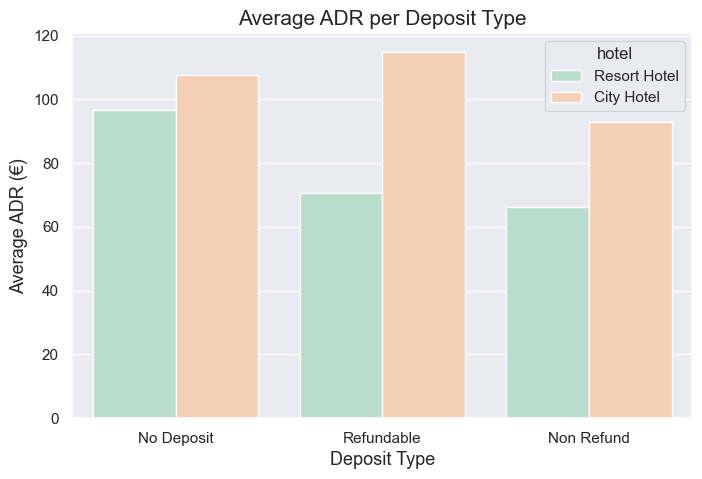

<Figure size 800x500 with 0 Axes>

In [74]:
#distribution of reserved_room_type
cplot = sns.barplot(x= df['deposit_type'], y = df['adr'],palette = 'Pastel2', hue = df['hotel'], ci = None)
plt.title('Average ADR per Deposit Type', fontsize = 15)

plt.xlabel("Deposit Type",fontsize = 13)
plt.ylabel('Average ADR (€)',fontsize = 13)
plt.show()
plt.savefig('figures/deposit vs adr .png', dpi = 300)

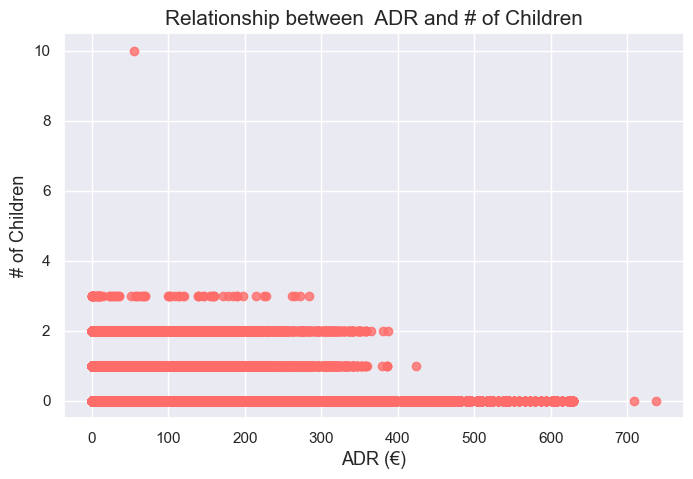

In [80]:
## Lead time vs ADR
plt.scatter(df['lead_time'],df['children'], alpha=0.8, color = '#FF6D6A' )
plt.title('Relationship between  ADR and # of Children', fontsize = 15)
plt.xlabel('ADR (€)', fontsize = 13)
plt.ylabel('# of Children', fontsize = 13)
plt.savefig('figures/children vs adr.png', dpi = 300)
plt.show()

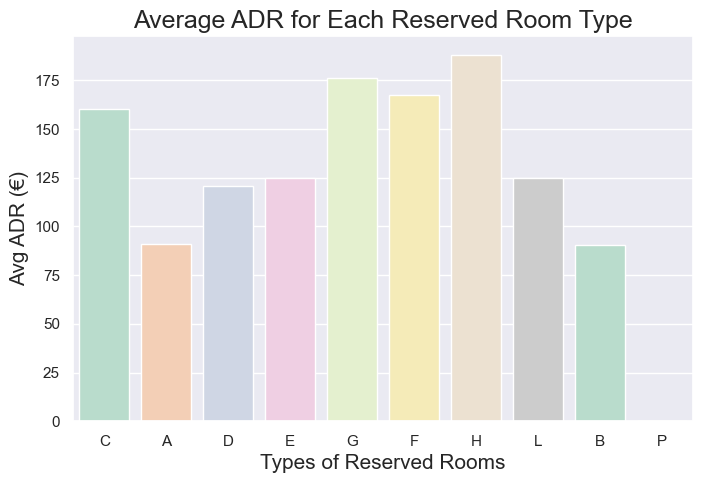

In [76]:
#reserved_room_type vs adr
cplot = sns.barplot(x= df['reserved_room_type'],y = df['adr'],palette = 'Pastel2', ci = None)
plt.title('Average ADR for Each Reserved Room Type', fontsize = 18)
plt.xlabel("Types of Reserved Rooms",fontsize = 15)

plt.ylabel('Avg ADR (€)',fontsize = 15)
plt.savefig('figures/reserved_room_type vs avg adr Distriubtion.png', dpi = 300)
plt.show()

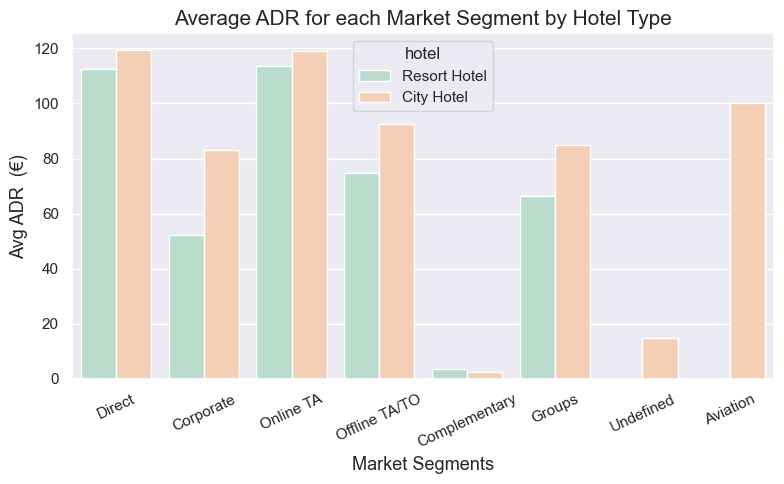

In [ ]:
#distribution of market Segment
sns.set(rc={"figure.figsize":(8, 5)})
cplot = sns.barplot(x= df['market_segment'],y = df['adr'],palette = 'Pastel2', hue = df['hotel'], ci = None)
plt.title( 'Average ADR for each Market Segment by Hotel Type', fontsize = 15)
sns.move_legend(ax, "center right")
plt.xlabel("Market Segments",fontsize = 13)
plt.xticks(rotation = 25)
plt.ylabel('Avg ADR  (€)',fontsize = 13)
plt.tight_layout()
plt.savefig('figures/market_segment vs adr.png', dpi = 300)
plt.show()

C:\Users\stuar\AppData\Local\Temp\ipykernel_16984\2646087141.py:38: UserWarning:

FixedFormatter should only be used together with FixedLocator



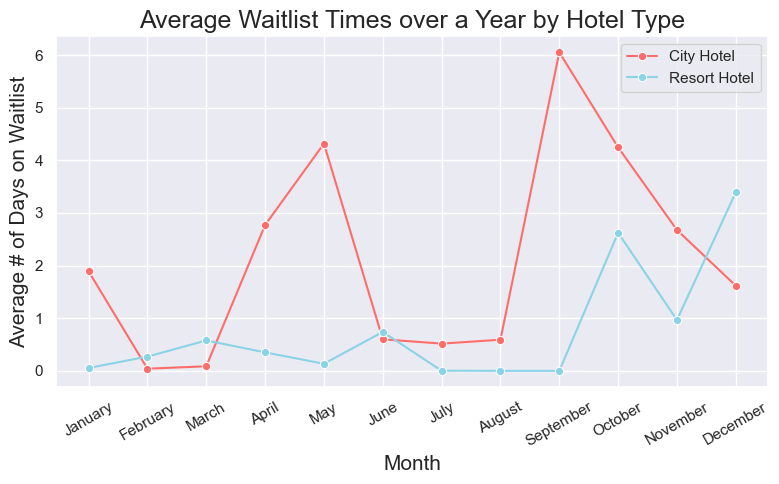

In [79]:
##(avg.) waitlist vs Arrival Month by Hotel type

#getting only average waitlist of reservations that did not cancel
no_cancel = df[df['is_canceled'] == 0]

#setting order for x ticks
ordered_month = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']

#create a new dataframe: waitlist_month
waitlist_orderedMonth = pd.DataFrame(ordered_month, columns=['Month'])

#populating resort waitlist
resort_waitlist = []
for x in range(len(waitlist_orderedMonth)):
    no_cancel_r = no_cancel[no_cancel['hotel'] == 'Resort Hotel']
    avg = np.mean(no_cancel_r[no_cancel_r['arrival_date_month'] == waitlist_orderedMonth.iloc[x,0]]['days_in_waiting_list']) 
    resort_waitlist.append(avg)
waitlist_orderedMonth['Resort_waitlist'] = resort_waitlist
                            
#populating city waitlist
city_waitlist = []
for x in range(len(waitlist_orderedMonth)):
    no_cancel_r = no_cancel[no_cancel['hotel'] == 'City Hotel']
    avg = np.mean(no_cancel_r[no_cancel_r['arrival_date_month'] == waitlist_orderedMonth.iloc[x,0]]['days_in_waiting_list']) 
    city_waitlist.append(avg)
waitlist_orderedMonth['City_waitlist'] = city_waitlist
    
#define figure size
fig, ax = plt.subplots()
sns.set(rc={"figure.figsize":(8, 5)})

#creating lineplot
sns.lineplot(data =waitlist_orderedMonth, x = 'Month', y = 'City_waitlist', color = '#FF6D6A', marker='o',ax = ax)
sns.lineplot(data =waitlist_orderedMonth, x = 'Month', y = 'Resort_waitlist', color = '#8BD3E6', marker='o',ax = ax)

#dressing the plot
ax.legend(['City Hotel','Resort Hotel'])
ax.set_xticklabels(ordered_month, rotation=30)
ax.set_title('Average Waitlist Times over a Year by Hotel Type', fontsize = 18)
ax.set_ylabel('Average # of Days on Waitlist',fontsize = 15)
ax.set_xlabel('Month', fontsize = 15)
plt.tight_layout()

plt.savefig('figures/average waitlist over time lineplot.png', dpi = 300)

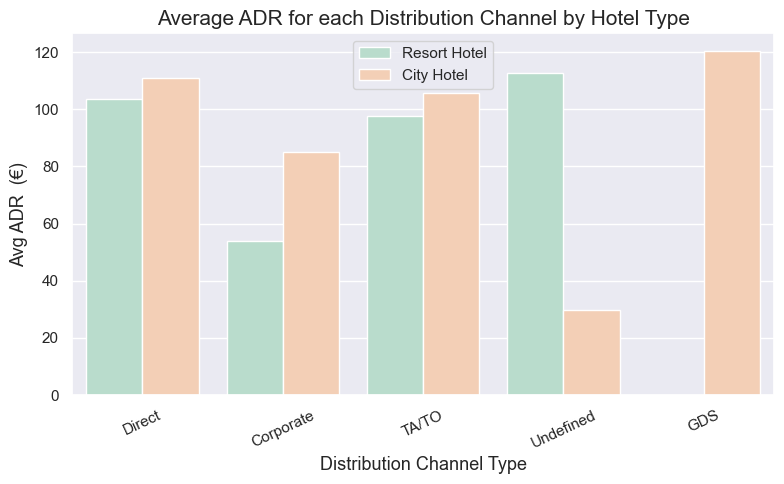

In [90]:
#distribution of distribution channel
sns.set(rc={"figure.figsize":(8, 5)})
cplot = sns.barplot(x= df['distribution_channel'],y = df['adr'],palette = 'Pastel2', hue = df['hotel'], ci = None)
plt.title( 'Average ADR for each Distribution Channel by Hotel Type', fontsize = 15)
plt.legend(loc='upper center')
plt.xlabel("Distribution Channel Type",fontsize = 13)
plt.xticks(rotation = 25)
plt.ylabel('Avg ADR  (€)',fontsize = 13)
plt.tight_layout()
plt.savefig('figures/distribution channel vs adr.png', dpi = 300)
plt.show()